In [1]:
import pandas as pd 
import numpy as np

In [2]:
train_file = r'C:\Users\Hanfi\Documents\Python\Data Sets\loan_data_train.csv' 
test_file = r'C:\Users\Hanfi\Documents\Python\Data Sets\loan_data_test.csv'

ld_train = pd.read_csv(train_file) 
ld_test = pd.read_csv(test_file)

In [3]:
# lets combine the data for data prep

ld_test['Interest.Rate']=np.nan
ld_train['data']='train'
ld_test['data']='test'
ld_test=ld_test[ld_train.columns]
ld_all=pd.concat([ld_train,ld_test],axis=0)

In [4]:
ld_all.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [5]:
ld_all.drop(['ID','Amount.Funded.By.Investors'],axis=1,inplace=True)

In [6]:
for col in ['Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[col]=ld_all[col].str.replace("%","")

In [7]:
for col in ['Amount.Requested', 'Interest.Rate','Debt.To.Income.Ratio',
            'Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
    ld_all[col]=pd.to_numeric(ld_all[col],errors='coerce')
    

In [8]:
k=ld_all['FICO.Range'].str.split("-",expand=True).astype(float)

ld_all['fico']=0.5*(k[0]+k[1])

del ld_all['FICO.Range']



In [9]:
ld_all['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [10]:
ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('years',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('year',"")

ld_all['Employment.Length']=np.where(ld_all['Employment.Length'].str[:2]=="10",10,ld_all['Employment.Length'])

ld_all['Employment.Length']=np.where(ld_all['Employment.Length'].str[0]=="<",0,ld_all['Employment.Length'])

ld_all['Employment.Length']=pd.to_numeric(ld_all['Employment.Length'],errors='coerce')

In [11]:
# Notice that to apply string function on pandas data frame columns you need to str attribute
cat_cols=ld_all.select_dtypes(['object']).columns

In [12]:
cat_cols=cat_cols[:-1]

In [13]:
# you can use following method if you want to ignore categories with too low frequencies ,
#in next section for logistic regression we will be using  pandas' get dummies function. 
# you can work with either of these . 
#ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much .

for col in cat_cols:
    freqs=ld_all[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        ld_all[name]=(ld_all[col]==cat).astype(int)
    del ld_all[col]
    print(col)
    
    

Loan.Length
Loan.Purpose
State
Home.Ownership


In [14]:
ld_all.isnull().sum()

Amount.Requested                     5
Interest.Rate                      300
Debt.To.Income.Ratio                 1
Monthly.Income                       3
Open.CREDIT.Lines                    9
Revolving.CREDIT.Balance             5
Inquiries.in.the.Last.6.Months       3
Employment.Length                   80
data                                 0
fico                                 0
Loan.Length_36 months                0
Loan.Purpose_debt_consolidation      0
Loan.Purpose_credit_card             0
Loan.Purpose_other                   0
Loan.Purpose_home_improvement        0
Loan.Purpose_major_purchase          0
Loan.Purpose_small_business          0
Loan.Purpose_car                     0
Loan.Purpose_wedding                 0
Loan.Purpose_medical                 0
Loan.Purpose_moving                  0
State_CA                             0
State_NY                             0
State_TX                             0
State_FL                             0
State_IL                 

In [15]:
for col in ld_all.columns:
    if (col not in ['Interest.Rate','data'])& (ld_all[col].isnull().sum()>0):
        ld_all.loc[ld_all[col].isnull(),col]=ld_all.loc[ld_all['data']=='train',col].mean()

In [16]:
ld_all.isnull().sum()

Amount.Requested                     0
Interest.Rate                      300
Debt.To.Income.Ratio                 0
Monthly.Income                       0
Open.CREDIT.Lines                    0
Revolving.CREDIT.Balance             0
Inquiries.in.the.Last.6.Months       0
Employment.Length                    0
data                                 0
fico                                 0
Loan.Length_36 months                0
Loan.Purpose_debt_consolidation      0
Loan.Purpose_credit_card             0
Loan.Purpose_other                   0
Loan.Purpose_home_improvement        0
Loan.Purpose_major_purchase          0
Loan.Purpose_small_business          0
Loan.Purpose_car                     0
Loan.Purpose_wedding                 0
Loan.Purpose_medical                 0
Loan.Purpose_moving                  0
State_CA                             0
State_NY                             0
State_TX                             0
State_FL                             0
State_IL                 

In [17]:
ld_train=ld_all[ld_all['data']=='train']
del ld_train['data']
ld_test=ld_all[ld_all['data']=='test']
ld_test.drop(['Interest.Rate','data'],axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
del ld_all

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
ld_train1,ld_train2=train_test_split(ld_train,test_size=0.2,random_state=2)

In [21]:
# Notice that only train data is used for imputing missing values in both train and test 

x_train1=ld_train1.drop('Interest.Rate',axis=1)
y_train1=ld_train1['Interest.Rate']



In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm=LinearRegression()

In [24]:
lm.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lm.intercept_

75.92121413595241

In [26]:
list(zip(x_train1.columns,lm.coef_))

[('Amount.Requested', 0.00015602405153877184),
 ('Debt.To.Income.Ratio', -0.003938504173777047),
 ('Monthly.Income', -2.6568573569416633e-05),
 ('Open.CREDIT.Lines', -0.03992260834024179),
 ('Revolving.CREDIT.Balance', -3.923647859060964e-06),
 ('Inquiries.in.the.Last.6.Months', 0.3361172111313284),
 ('Employment.Length', 0.03499367189451075),
 ('fico', -0.08667701121950794),
 ('Loan.Length_36 months', -3.1437472469505945),
 ('Loan.Purpose_debt_consolidation', -0.4673935690355926),
 ('Loan.Purpose_credit_card', -0.6069873604061786),
 ('Loan.Purpose_other', 0.4441714227019271),
 ('Loan.Purpose_home_improvement', -0.361189984918142),
 ('Loan.Purpose_major_purchase', -0.09589524932665627),
 ('Loan.Purpose_small_business', 0.06800548772824055),
 ('Loan.Purpose_car', 0.025259628036011506),
 ('Loan.Purpose_wedding', -0.7791542650056422),
 ('Loan.Purpose_medical', -0.4281152109954972),
 ('Loan.Purpose_moving', 1.2845276544595732),
 ('State_CA', -0.21159715256758915),
 ('State_NY', -0.12777976

In [27]:
x_train2=ld_train2.drop('Interest.Rate',axis=1)

In [28]:
predicted_ir=lm.predict(x_train2)

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mean_absolute_error(ld_train2['Interest.Rate'],predicted_ir)

1.6278267948892087

In [56]:
# model values
model_fitted_y = predicted_ir
# model residuals
model_residuals = ld_train2['Interest.Rate']-predicted_ir
# normalized residuals
import scipy
model_norm_residuals = [number/scipy.std(model_residuals) for number in model_residuals]
#model_norm_residuals = lm.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

AttributeError: 'LinearRegression' object has no attribute 'get_influence'

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
zz = 'Interest.Rate'
aa = ld_train2[['Amount.Requested', 'Debt.To.Income.Ratio',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'fico',
       'Loan.Length_36 months', 'Loan.Purpose_debt_consolidation',
       'Loan.Purpose_credit_card', 'Loan.Purpose_other',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_major_purchase',
       'Loan.Purpose_small_business', 'Loan.Purpose_car',
       'Loan.Purpose_wedding', 'Loan.Purpose_medical', 'Loan.Purpose_moving',
       'State_CA', 'State_NY', 'State_TX', 'State_FL', 'State_IL', 'State_GA',
       'State_PA', 'State_NJ', 'State_VA', 'State_MA', 'State_OH', 'State_MD',
       'State_NC', 'State_CO', 'State_WA', 'State_CT', 'State_AZ', 'State_MI',
       'State_MN', 'State_AL', 'State_MO', 'State_NV', 'State_OR', 'State_SC',
       'State_WI', 'State_KY', 'State_LA', 'State_KS',
       'Home.Ownership_MORTGAGE', 'Home.Ownership_RENT']]

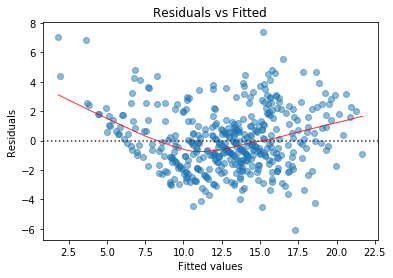

In [48]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, zz, data=ld_train2,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

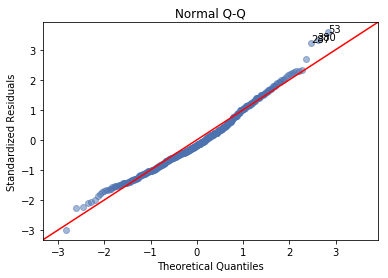

In [55]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(np.array(model_norm_residuals))
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

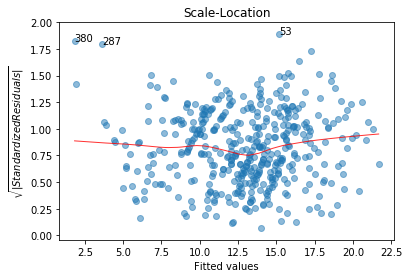

In [58]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]))

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : ndarray
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
    vif : float